In [1]:
import numpy as np
from array import array
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [5]:
dirin='/home/rdavis39/CLIM470/CLIM-470-Numerical-Weather-Prediction/Project/'
# zDfil='gh.dat'
# uDfil='uwnd.dat'
# vDfil='vwnd.dat'
topo_file = "topo.dat"

In [3]:
nx=12
ny=4
recl=(nx*ny)*4
topo_bin=np.zeros((ny,nx))

In [14]:
ds_topo_bin = open(dirin+topo_file,'rb')

tmp = ds_topo_bin.read(recl)
tmp1 = array('f',tmp)
#tmp2=tmp1[1:-1] #for fortran sequential
ds_topo_bin=np.reshape(tmp1,(ny,nx))

In [10]:
tmp1

array('f', [0.0, 0.0, 0.0, 0.0, 0.0, 2000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

Text(0.5, 1.0, 'gh snapshot')

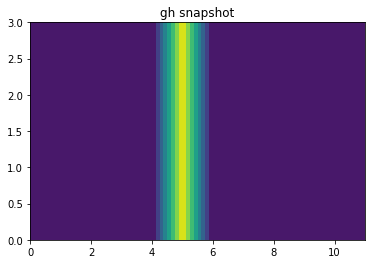

In [19]:
# plot one time 
fig, ax = plt.subplots()
zc = ax.contourf(ds_topo_bin)
ax.set_title('gh snapshot')

In [ ]:
# plot the time average 
fig, ax = plt.subplots()
zc = ax.contour(z_bin_mean)
ax.set_title('gh time mean')

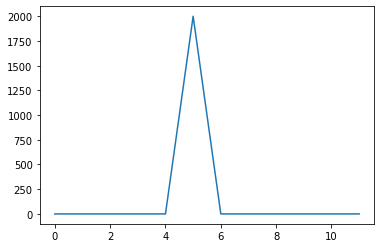

In [18]:
fig, ax = plt.subplots()
zc = ax.plot(ds_topo_bin[0,:])

In [ ]:
x=np.arange(0,360,2.5)
y=np.arange(-90,90,2.5)
fig, ax = plt.subplots(1,2,figsize=(10,3))
zc = ax[0].contour(x,y,z_bin[-1,:,:])
ax[0].set_title('gh snapshot')
zc_mean = ax[1].contour(x,y,z_bin_mean)
ax[1].set_title('gh time mean')

In [ ]:
# plot filled contours
fig, ax = plt.subplots(figsize=(10,4))
zc = ax.contourf(z_bin_mean,cmap=cm.coolwarm)
plt.colorbar(zc)

# plot the contour lines using gray lines
zl = ax.contour(z_bin_mean,cmap=cm.gray)
ax.set_title('gh time mean')

In [ ]:
# Plot gh and wind vectors
fig, ax = plt.subplots(figsize=(10,3))
zc = ax.contour(z_bin_mean[36:72,:])
skip=(slice(None, None, 3), slice(None, None, 3))
x=np.arange(nlon)
y=np.arange(nlat)
zc = ax.quiver(x[::3],y[0:36:3],u_bin_mean[36:72,:][skip], v_bin_mean[36:72,:][skip],color='grey',
              headwidth=2,headlength=2)
